In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
# from helpers import *
from LDMIBSS import *
np.random.seed(13)
%load_ext autoreload
%autoreload 2

In [3]:
N = 500000
# Generate sufficiently scattered source signals
S = np.random.uniform(-1.1,1.1, size = (5,N))
S = S*(S>=-1)*(S<=1) + (S>1)*1 + (S<-1)*(-1)
# Number of Source and Mixtures
NumberofSources = S.shape[0]
NumberofMixtures = 8

# Generate Mxr random mixing from i.i.d N(0,1)
A=np.random.randn(NumberofMixtures,NumberofSources)
X=np.dot(A,S)
X=X+0.001*np.random.randn(X.shape[0],X.shape[1])
print('The following is the mixture matrix A')
display_matrix(A)

The following is the mixture matrix A


<IPython.core.display.Math object>

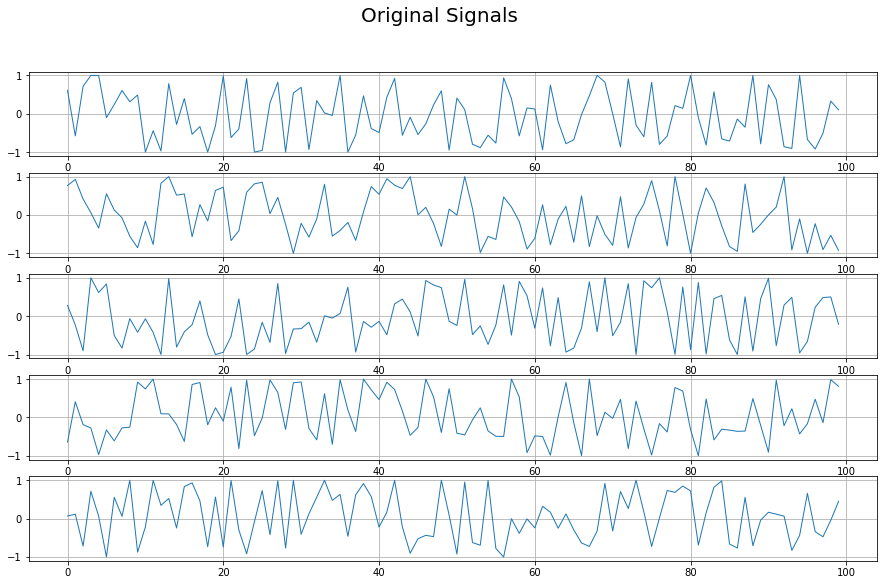

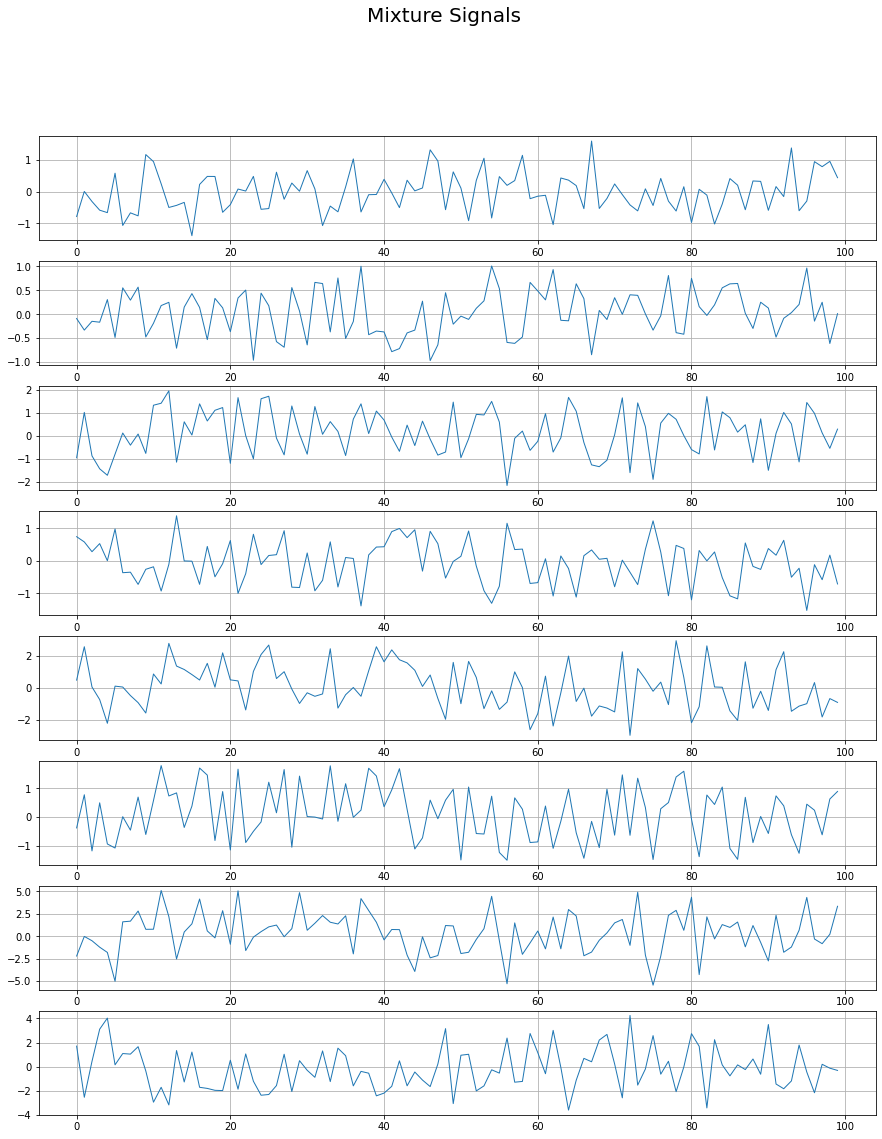

In [4]:
subplot_1D_signals(S.T[0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(X.T[0:100], title = 'Mixture Signals', figsize = (15,18), colorcode = None)

In [5]:
s_dim = S.shape[0]
x_dim = X.shape[0]
debug_iteration_point = 1000
model = OnlineLDMIBSS(s_dim = s_dim, x_dim = x_dim, set_ground_truth = True, S = S, A = A)

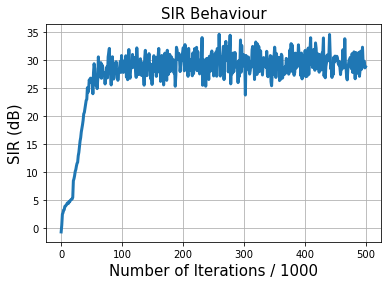

100%|████████████████████████████████████████████████████████████████████████| 500000/500000 [02:38<00:00, 3155.58it/s]


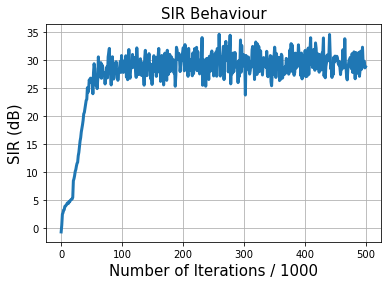

In [6]:
model.fit_batch_antisparse(X = X, n_epochs = 1, plot_in_jupyter = True,  debug_iteration_point = debug_iteration_point)

Final SIR: 28.841053310526892


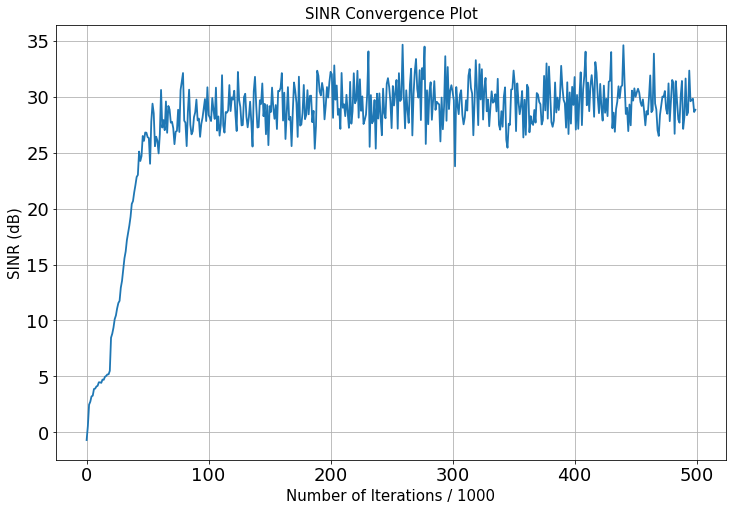

In [7]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
plot_convergence_plot(model.SIR_list, xlabel = 'Number of Iterations / {}'.format(debug_iteration_point),
                     ylabel = 'SINR (dB)', title = 'SINR Convergence Plot', colorcode = None, linewidth = 1.8)

print('Final SIR: {}'.format(np.array(model.SIR_list[-1])))

In [8]:
Wf = model.Wf
Y = Wf @ X
Y.shape, X.shape, S.shape

((5, 500000), (8, 500000), (5, 500000))

In [9]:
Y_ = signed_and_permutation_corrected_sources(S.T,Y.T).T

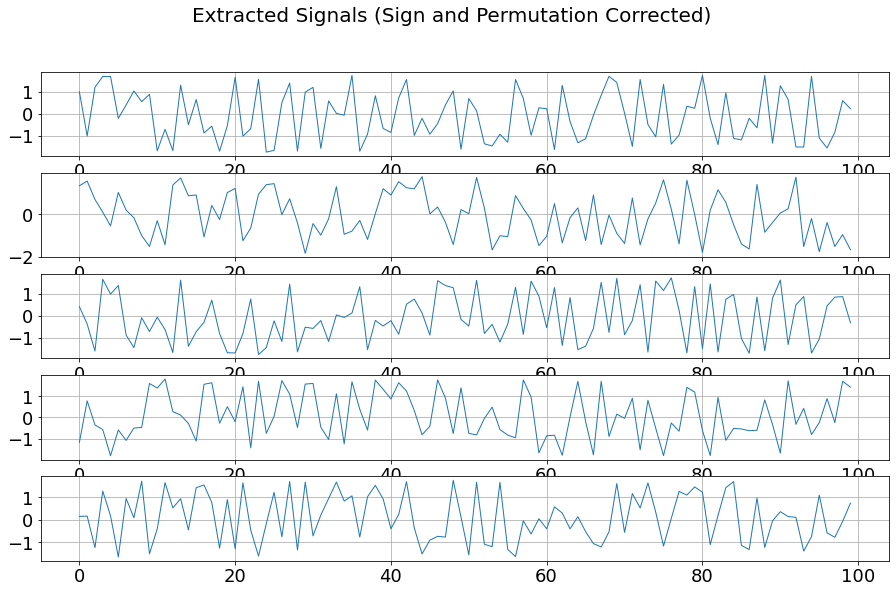

In [10]:
subplot_1D_signals(X = Y_.T[0:100], title = 'Extracted Signals (Sign and Permutation Corrected)' ,figsize = (15.2,9), colorcode = None)

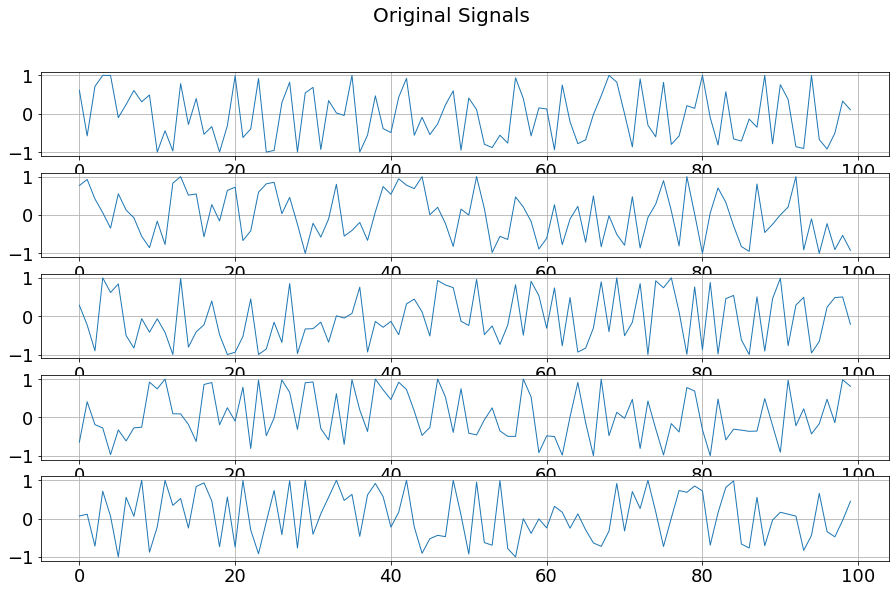

In [11]:
subplot_1D_signals(X = S.T[0:100], title = 'Original Signals' ,figsize = (15.2,9), colorcode = None)